In [20]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_excel('Influenza_data.xlsx')
df.sample(10)

,WHO region,ITZ,COUNTRY/AREA/TERRITORY,COUNTRY_CODE,ORIGIN_SOURCE,ISO_YEAR,ISO_WEEK,ISO_SDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,AH5,ANOTSUBTYPED,INF_A,BVIC,BYAM,BNOTDETERMINED,INF_B,INF_ALL,INF_NEGATIVE,ILI_ACTIVITY
331,SEAR,Southern Asia,India,IND,NOTDEFINED,2001,47,2001-11-18T18:30:00.000Z,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2
1007,SEAR,Southern Asia,India,IND,NOTDEFINED,2019,24,2019-06-09T18:30:00.000Z,566.0,565.0,...,NaN,NaN,74.0,8.0,NaN,1.0,9.0,83.0,482.0,4
163,SEAR,Southern Asia,India,IND,NOTDEFINED,1997,27,1997-06-29T18:30:00.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
274,SEAR,Southern Asia,India,IND,NOTDEFINED,2000,34,2000-08-20T18:30:00.000Z,NaN,1.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3
930,SEAR,Southern Asia,India,IND,NOTDEFINED,2017,51,2017-12-17T18:30:00.000Z,177.0,177.0,...,NaN,NaN,11.0,NaN,NaN,12.0,12.0,23.0,154.0,3
1120,SEAR,Southern Asia,India,IND,NOTDEFINED,2022,2,2022-01-09T18:30:00.000Z,502.0,502.0,...,NaN,NaN,6.0,1.0,NaN,NaN,1.0,7.0,495.0,2
43,SEAR,Southern Asia,India,IND,NONSENTINEL,2022,23,2022-06-05T18:30:00.000Z,135.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,2
899,SEAR,Southern Asia,India,IND,NOTDEFINED,2017,17,2017-04-23T18:30:00.000Z,368.0,368.0,...,NaN,NaN,63.0,NaN,NaN,3.0,3.0,66.0,303.0,5
75,SEAR,Southern Asia,India,IND,NONSENTINEL,2023,3,2023-01-15T18:30:00.000Z,39.0,39.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,37.0,3
1190,SEAR,Southern Asia,India,IND,SENTINEL,2022,18,2022-05-01T18:30:00.000Z,42.0,42.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,41.0,3


### Reading the cleaned data file

In [22]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,DATE,INF_A,INF_B
0,1996-12-29,0.0,0.0
1,1997-02-23,0.0,0.0
2,1997-03-02,0.0,0.0
3,1997-03-09,0.0,0.0
4,1997-03-16,0.0,0.0


## INF_A

In [23]:
df_A = df[['DATE','INF_A']]

In [24]:
df_A

,DATE,INF_A
0,1996-12-29,0.0
1,1997-02-23,0.0
2,1997-03-02,0.0
3,1997-03-09,0.0
4,1997-03-16,0.0
...,...,...
1111,2024-06-16,18.0
1112,2024-06-23,17.0
1113,2024-06-30,44.0
1114,2024-07-14,107.0


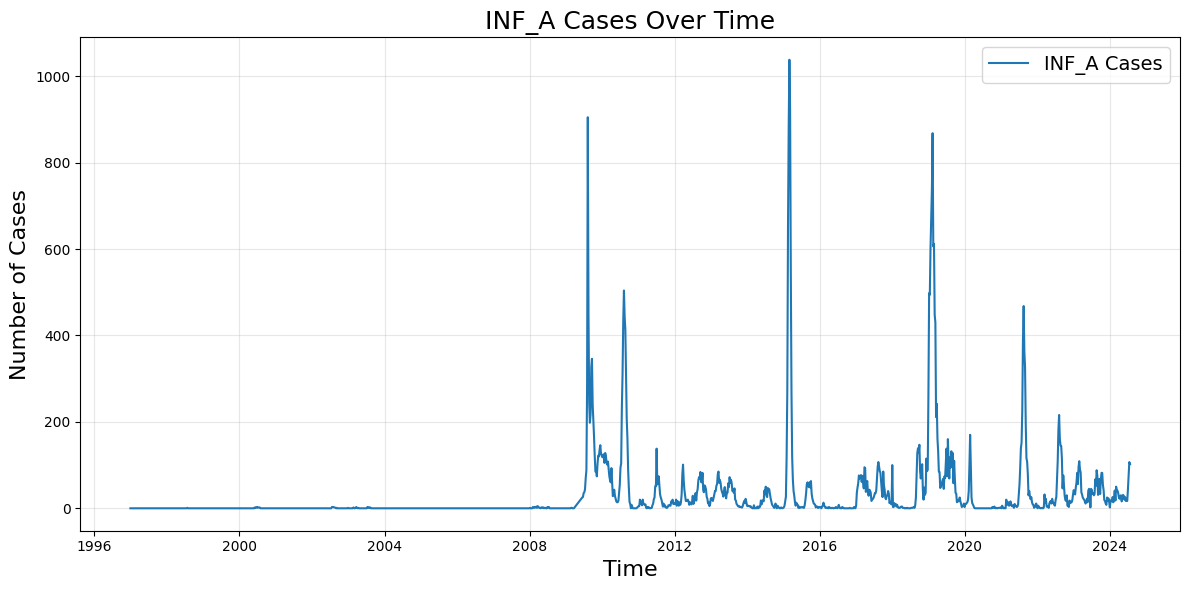

In [25]:
import matplotlib.pyplot as plt

# Ensure DATE is datetime for better plotting
df_A['DATE'] = pd.to_datetime(df_A['DATE'])

plt.figure(figsize=(12, 6))
plt.plot(df_A['DATE'], df_A['INF_A'], label='INF_A Cases')
plt.xlabel("Time", fontsize=16)
plt.ylabel("Number of Cases", fontsize=16)
plt.title("INF_A Cases Over Time", fontsize=18)
plt.legend(loc='best', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
df_A["unique_id"]="INF_A Cases"
df_A.columns=["ds", "y", "unique_id"]
df_A.head()

,ds,y,unique_id
0,1996-12-29,0.0,INF_A Cases
1,1997-02-23,0.0,INF_A Cases
2,1997-03-02,0.0,INF_A Cases
3,1997-03-09,0.0,INF_A Cases
4,1997-03-16,0.0,INF_A Cases


In [27]:
print(df_A.dtypes)

ds           datetime64[ns]
y                   float64
unique_id            object
dtype: object


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

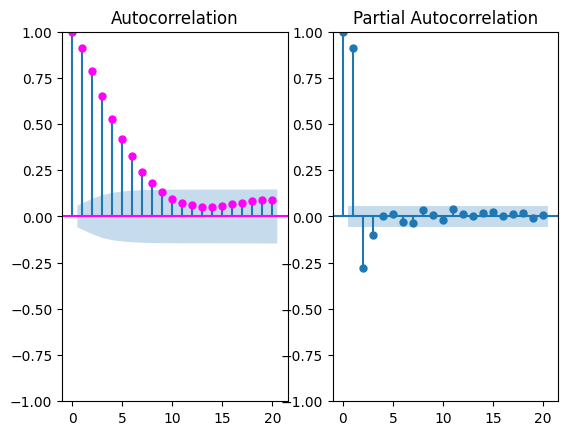

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df_A["y"],  lags=20, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation")

# Plot
plot_pacf(df_A["y"],  lags=20, ax=axs[1])
axs[1].set_title('Partial Autocorrelation')

plt.show()

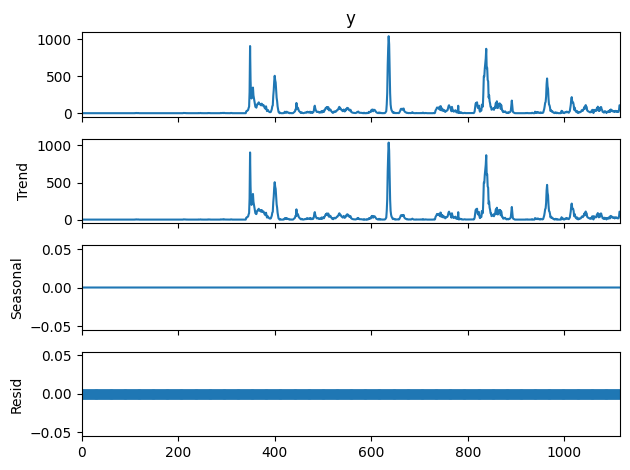

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df_A["y"], model = "add", period=1)
a.plot()
plt.show()

In [31]:
train_A = df_A[:1088]
test_A = df_A[1088:]

In [32]:
train_A.shape, test_A.shape

((1088, 3), (28, 3))

## NBEATS

In [33]:
from neuralforecast.models import NBEATS
from neuralforecast import NeuralForecast

In [34]:
# Step 1: Define your model
model = [NBEATS(input_size=104, h=28)]

# Step 2: Initialize NeuralForecast (do NOT pass df here)
nf = NeuralForecast(
    models=model,
    freq='W'   # Weekly data
)

# Step 3: Fit the model (this is where you pass df)
nf.fit(df=train_A)

# Step 4: Forecast
forecasts = nf.predict()
print(forecasts)


Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.7 M  | train
-------------------------------------------------------
2.7 M     Trainable params
7.5 K     Non-trainable params
2.7 M     Total params
10.636    Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

      unique_id         ds      NBEATS
0   INF_A Cases 2024-01-07   -7.470078
1   INF_A Cases 2024-01-14   -8.067478
2   INF_A Cases 2024-01-21   -2.978992
3   INF_A Cases 2024-01-28   -2.841921
4   INF_A Cases 2024-02-04   -9.560232
5   INF_A Cases 2024-02-11    4.015885
6   INF_A Cases 2024-02-18    3.882795
7   INF_A Cases 2024-02-25   20.320944
8   INF_A Cases 2024-03-03   24.385899
9   INF_A Cases 2024-03-10   39.128059
10  INF_A Cases 2024-03-17   43.034645
11  INF_A Cases 2024-03-24   30.208391
12  INF_A Cases 2024-03-31   28.239037
13  INF_A Cases 2024-04-07   38.571171
14  INF_A Cases 2024-04-14   30.468584
15  INF_A Cases 2024-04-21   11.608025
16  INF_A Cases 2024-04-28   25.193241
17  INF_A Cases 2024-05-05   29.745813
18  INF_A Cases 2024-05-12    0.882784
19  INF_A Cases 2024-05-19   29.019354
20  INF_A Cases 2024-05-26   38.955639
21  INF_A Cases 2024-06-02    2.033592
22  INF_A Cases 2024-06-09   26.872452
23  INF_A Cases 2024-06-16   57.499348
24  INF_A Cases 2024-06-2

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Step 5: Merge forecasts with actual test values
# Ensure test_A has columns: ['unique_id', 'ds', 'y']
merged = forecasts.merge(test_A, on=['unique_id', 'ds'], how='inner')

# Extract true and predicted values
y_true = merged['y']
y_pred = merged['NBEATS']

# Step 6: Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100  # avoid division by zero

# Step 7: Display the metrics

print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ MAE  : {mae:.2f}")
print(f"✅ MAPE : {mape:.2f}%")


✅ RMSE : 25.86
✅ MAE  : 19.48
✅ MAPE : 85.68%


In [36]:
merged.head()

,unique_id,ds,NBEATS,y
0,INF_A Cases,2024-01-07,-7.470078,18.0
1,INF_A Cases,2024-01-14,-8.067478,19.0
2,INF_A Cases,2024-01-21,-2.978992,16.0
3,INF_A Cases,2024-01-28,-2.841921,26.0
4,INF_A Cases,2024-02-04,-9.560232,14.0


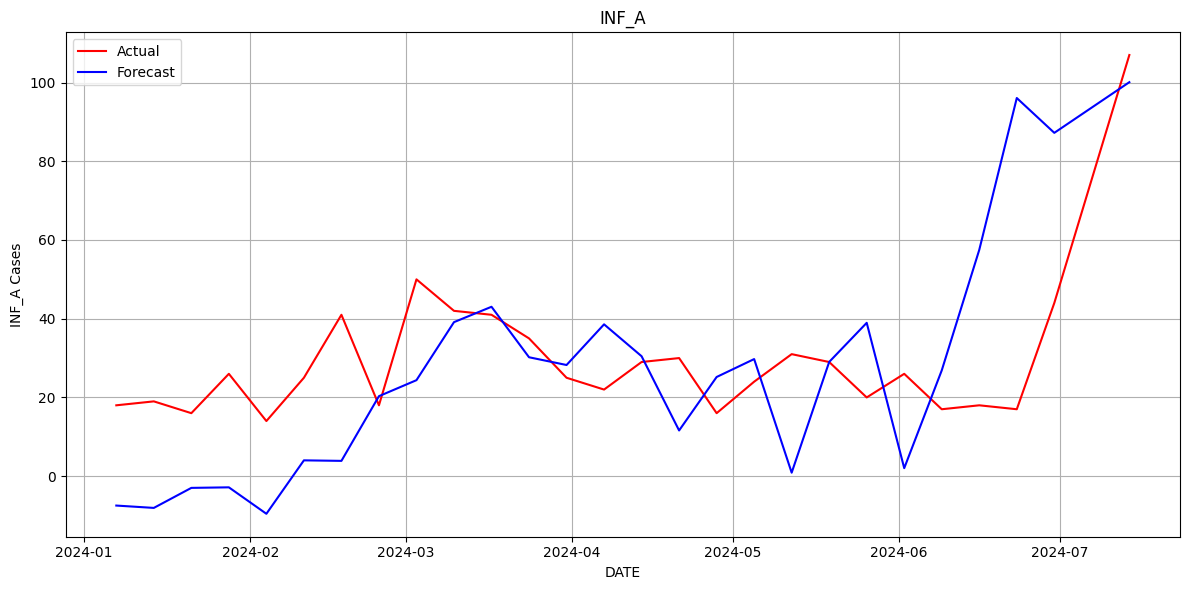

In [37]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(merged['ds'], merged['y'], label='Actual', color='red')

# Plot forecast
plt.plot(merged['ds'], merged['NBEATS'], label='Forecast', color='blue')

# Add labels and title
plt.xlabel("DATE")
plt.ylabel("INF_A Cases")
plt.title("INF_A")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


### Plotting graphs for training and testing period


In [77]:
forecasts.head()

,unique_id,ds,NBEATS
0,INF_A Cases,2024-01-07,-7.470078
1,INF_A Cases,2024-01-14,-8.067478
2,INF_A Cases,2024-01-21,-2.978992
3,INF_A Cases,2024-01-28,-2.841921
4,INF_A Cases,2024-02-04,-9.560232


## FOR INF_B

In [39]:
df_B = df[['DATE','INF_B']]

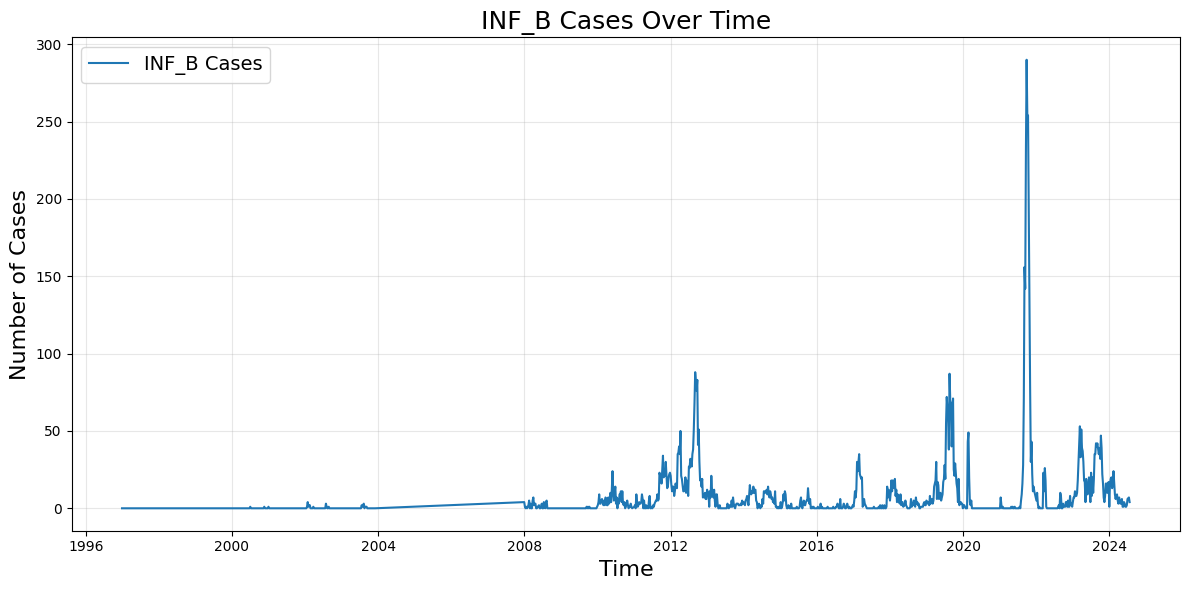

In [40]:
import matplotlib.pyplot as plt

# Ensure DATE is datetime for better plotting
df_B['DATE'] = pd.to_datetime(df_B['DATE'])

plt.figure(figsize=(12, 6))
plt.plot(df_B['DATE'], df_B['INF_B'], label='INF_B Cases')
plt.xlabel("Time", fontsize=16)
plt.ylabel("Number of Cases", fontsize=16)
plt.title("INF_B Cases Over Time", fontsize=18)
plt.legend(loc='best', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [41]:
df_B["unique_id"]="INF_B Cases"
df_B.columns=["ds", "y", "unique_id"]
df_B.head()

,ds,y,unique_id
0,1996-12-29,0.0,INF_B Cases
1,1997-02-23,0.0,INF_B Cases
2,1997-03-02,0.0,INF_B Cases
3,1997-03-09,0.0,INF_B Cases
4,1997-03-16,0.0,INF_B Cases


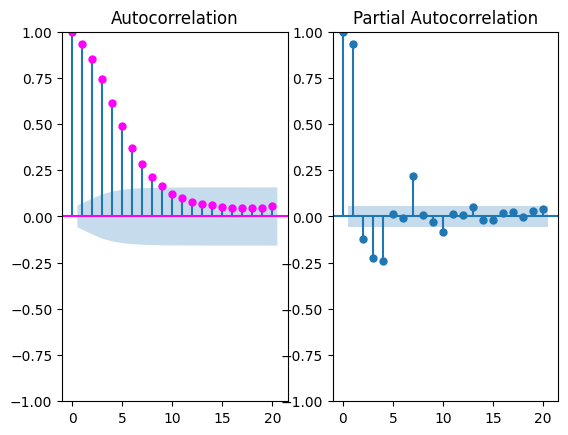

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df_B["y"],  lags=20, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation")

# Plot
plot_pacf(df_B["y"],  lags=20, ax=axs[1])
axs[1].set_title('Partial Autocorrelation')

plt.show()

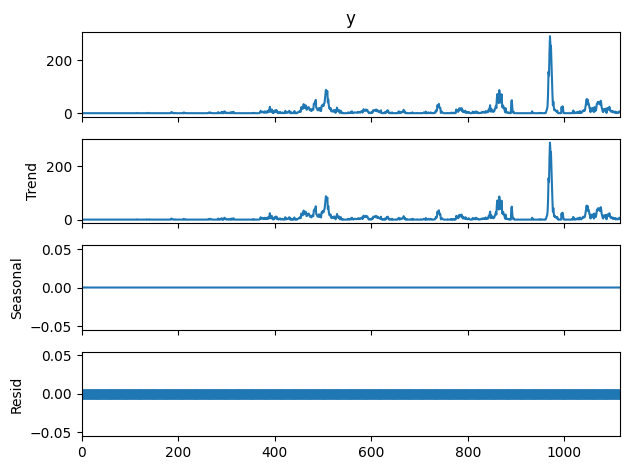

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose 
b = seasonal_decompose(df_B["y"], model = "add", period=1)
b.plot()
plt.show()

In [44]:
train_B = df_B[:1088]
test_B = df_B[1088:]
train_B.shape,test_B.shape

((1088, 3), (28, 3))

In [45]:
test_B.columns

Index(['ds', 'y', 'unique_id'], dtype='object')

In [50]:
# Step 1: Define your model
model = [NBEATS(input_size=26, h=28)]

# Step 2: Initialize NeuralForecast (do NOT pass df here)
nf = NeuralForecast(
    models=model,
    freq='W'   # Weekly data
)

# Step 3: Fit the model (this is where you pass df)
nf.fit(df=train_B)

# Step 4: Forecast
forecasts = nf.predict()
print(forecasts)


Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.5 M  | train
-------------------------------------------------------
2.5 M     Trainable params
3.1 K     Non-trainable params
2.5 M     Total params
9.979     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

      unique_id         ds     NBEATS
0   INF_B Cases 2024-01-07   8.316658
1   INF_B Cases 2024-01-14   4.024037
2   INF_B Cases 2024-01-21   3.228147
3   INF_B Cases 2024-01-28   8.320070
4   INF_B Cases 2024-02-04  10.520555
5   INF_B Cases 2024-02-11  10.300451
6   INF_B Cases 2024-02-18   2.580444
7   INF_B Cases 2024-02-25  -4.214580
8   INF_B Cases 2024-03-03   8.315720
9   INF_B Cases 2024-03-10   5.881935
10  INF_B Cases 2024-03-17   9.553921
11  INF_B Cases 2024-03-24   2.552161
12  INF_B Cases 2024-03-31   5.028495
13  INF_B Cases 2024-04-07   3.338528
14  INF_B Cases 2024-04-14   1.156420
15  INF_B Cases 2024-04-21   1.500429
16  INF_B Cases 2024-04-28   4.940534
17  INF_B Cases 2024-05-05  -1.180546
18  INF_B Cases 2024-05-12  -0.682569
19  INF_B Cases 2024-05-19  -0.291003
20  INF_B Cases 2024-05-26   0.040950
21  INF_B Cases 2024-06-02   0.255858
22  INF_B Cases 2024-06-09   1.676011
23  INF_B Cases 2024-06-16  -0.654582
24  INF_B Cases 2024-06-23  -0.222514
25  INF_B Ca

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Step 5: Merge forecasts with actual test values
# Ensure test_A has columns: ['unique_id', 'ds', 'y']
merged = forecasts.merge(test_B, on=['unique_id', 'ds'], how='inner')

# Extract true and predicted values
y_true = merged['y']
y_pred = merged['NBEATS']

# Step 6: Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100  # avoid division by zero

# Step 7: Display the metrics
print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ MAE  : {mae:.2f}")
print(f"✅ MAPE : {mape:.2f}%")

✅ RMSE : 7.22
✅ MAE  : 5.40
✅ MAPE : 80.51%


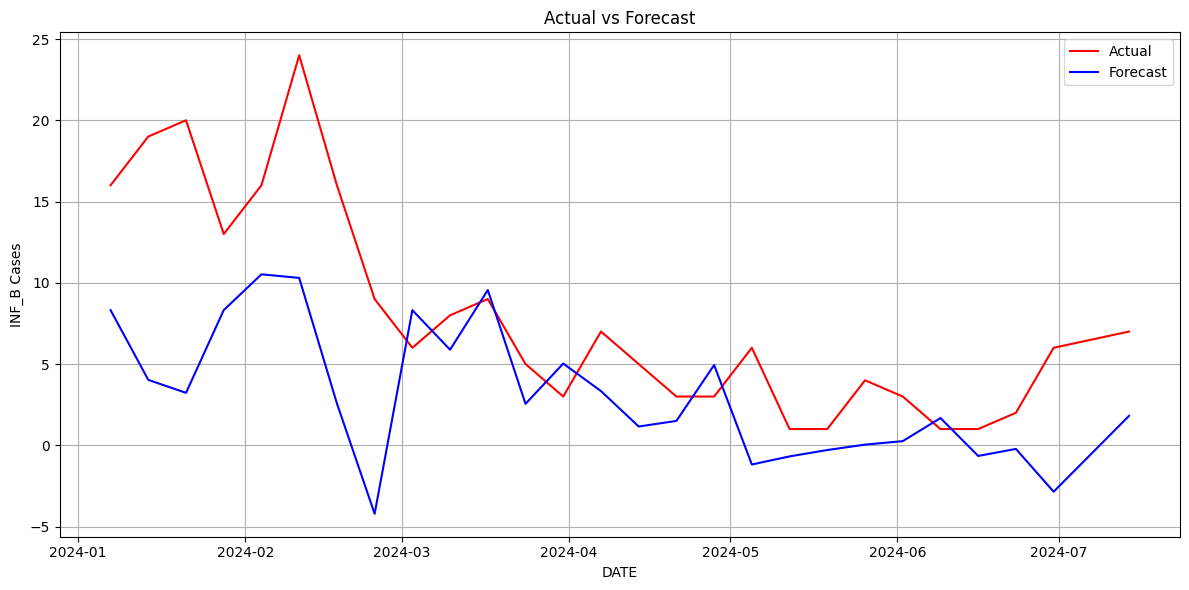

In [52]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(merged['ds'], merged['y'], label='Actual', color='red')

# Plot forecast
plt.plot(merged['ds'], merged['NBEATS'], label='Forecast', color='blue')

# Add labels and title
plt.xlabel("DATE")
plt.ylabel("INF_B Cases")
plt.title("Actual vs Forecast")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# List of input sizes to test
input_sizes = [4,26]
h = 28  # Forecast horizon

# Store results
results = []

for input_size in input_sizes:
    print(f"\n📌 Testing NBEATS with input_size = {input_size}")

    # Step 1: Define and train model
    models = [NBEATS(input_size=input_size, h=h)]
    nf = NeuralForecast(models=models, freq='W')
    nf.fit(df=train_B)

    # Step 2: Forecast
    forecasts = nf.predict()
    
    # Step 3: Merge forecasts with true values
    merged = forecasts.merge(test_B, on=['unique_id', 'ds'], how='inner')
    y_pred = merged['NBEATS']
    y_true = merged['y']

    # Step 4: Evaluate
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

    print(f"✅ RMSE : {rmse:.2f}")
    print(f"✅ MAE  : {mae:.2f}")
    print(f"✅ MAPE : {mape:.2f}%")

    # Store results
    results.append({
        'input_size': input_size,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    })

# Step 5: Show comparison
results_df = pd.DataFrame(results)
print("\n📊 Performance Comparison:")
print(results_df.sort_values(by='RMSE'))


Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
1.8 K     Non-trainable params
2.4 M     Total params
9.793     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode



📌 Testing NBEATS with input_size = 4


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.5 M  | train
-------------------------------------------------------
2.5 M     Trainable params
3.1 K     Non-trainable params
2.5 M     Total params
9.979     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


✅ RMSE : 11.84
✅ MAE  : 8.73
✅ MAPE : 148.26%

📌 Testing NBEATS with input_size = 26


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

✅ RMSE : 7.22
✅ MAE  : 5.40
✅ MAPE : 80.51%

📊 Performance Comparison:
   input_size       RMSE       MAE        MAPE
1          26   7.216442  5.399448   80.507948
0           4  11.838708  8.727629  148.260532


#### I tried with multiple input size these were best results achieved